<a href="https://colab.research.google.com/github/salllwaaa/Handwritten_Digits_Recognetion/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**importing Important libraries**



In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

In [3]:
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")

#**Check Data**

In [5]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print(train_df.info() )
print(train_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
(42000, 785)


In [16]:
print(test_df.info())
print(test_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None
(28000, 784)


*Split the target from training data*

In [14]:
X = train_df.iloc[:, 1:785]
#Target
y = train_df.iloc[:, 0]

X_test = test_df.iloc[:, 0:784]

**Visualizing the data using TSNE**

(TSNE - t-Distributed Stochastic Neighbor embedding. This is a dimensionality reduction algorithm that is designed to keep local structure in the high dimensional data set)

In [15]:
X_tsn = X/255


tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)

#**Plotting Data**

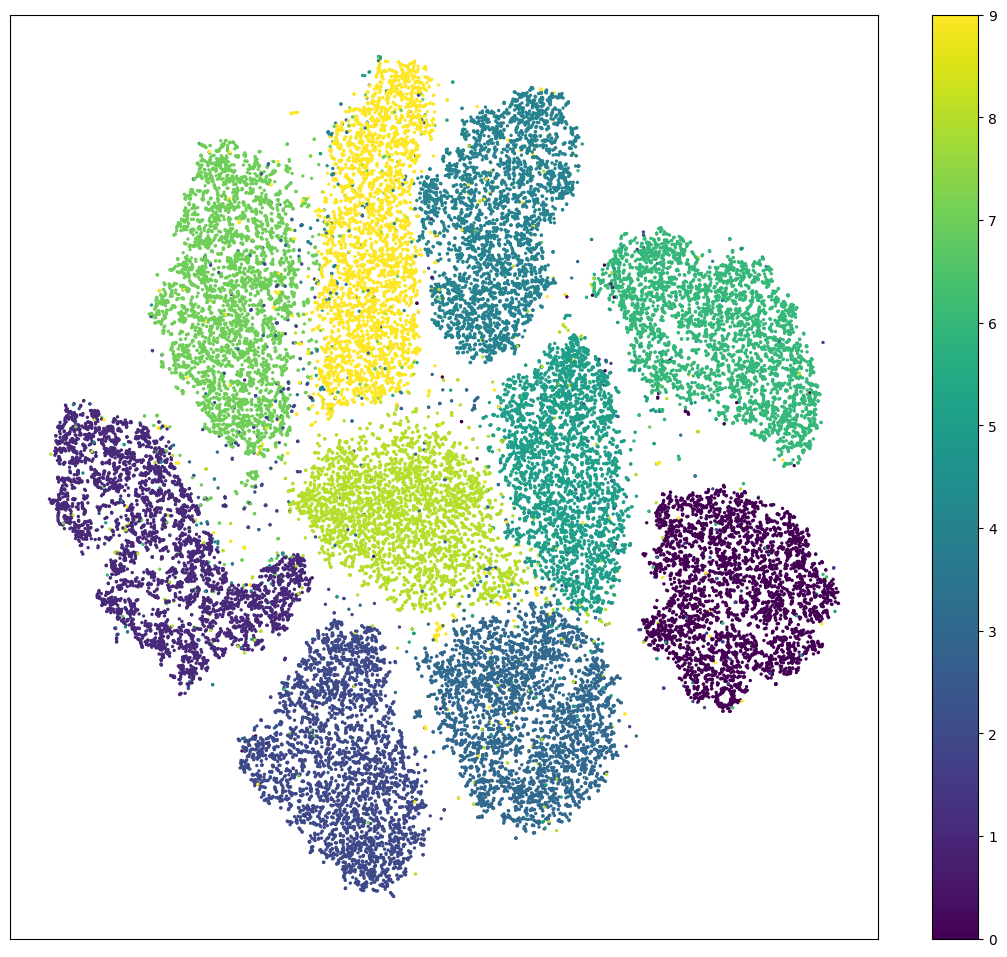

In [17]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

#**Splitting data into training and validation dataset**

In [19]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

**Flatten training, testing, and validation data**

In [20]:
x_trainF = X_train.to_numpy().reshape(33600, 28, 28)
y_trainF = y_train.values
x_validationF = X_validation.to_numpy().reshape(8400, 28, 28)
y_validationF = y_validation.values
x_testF = test_df.to_numpy().reshape(28000, 28, 28)

In [21]:
IMAGE_WIDTH=28
IMAGE_HEIGHT=28
IMAGE_CHANNELS=1

#**Exploring data**

In [22]:
pd.DataFrame(x_trainF[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


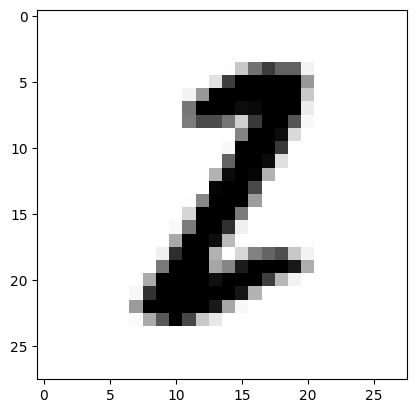

In [23]:
plt.imshow(x_trainF[0], cmap=plt.cm.binary)
plt.show()

**print some more training examples**

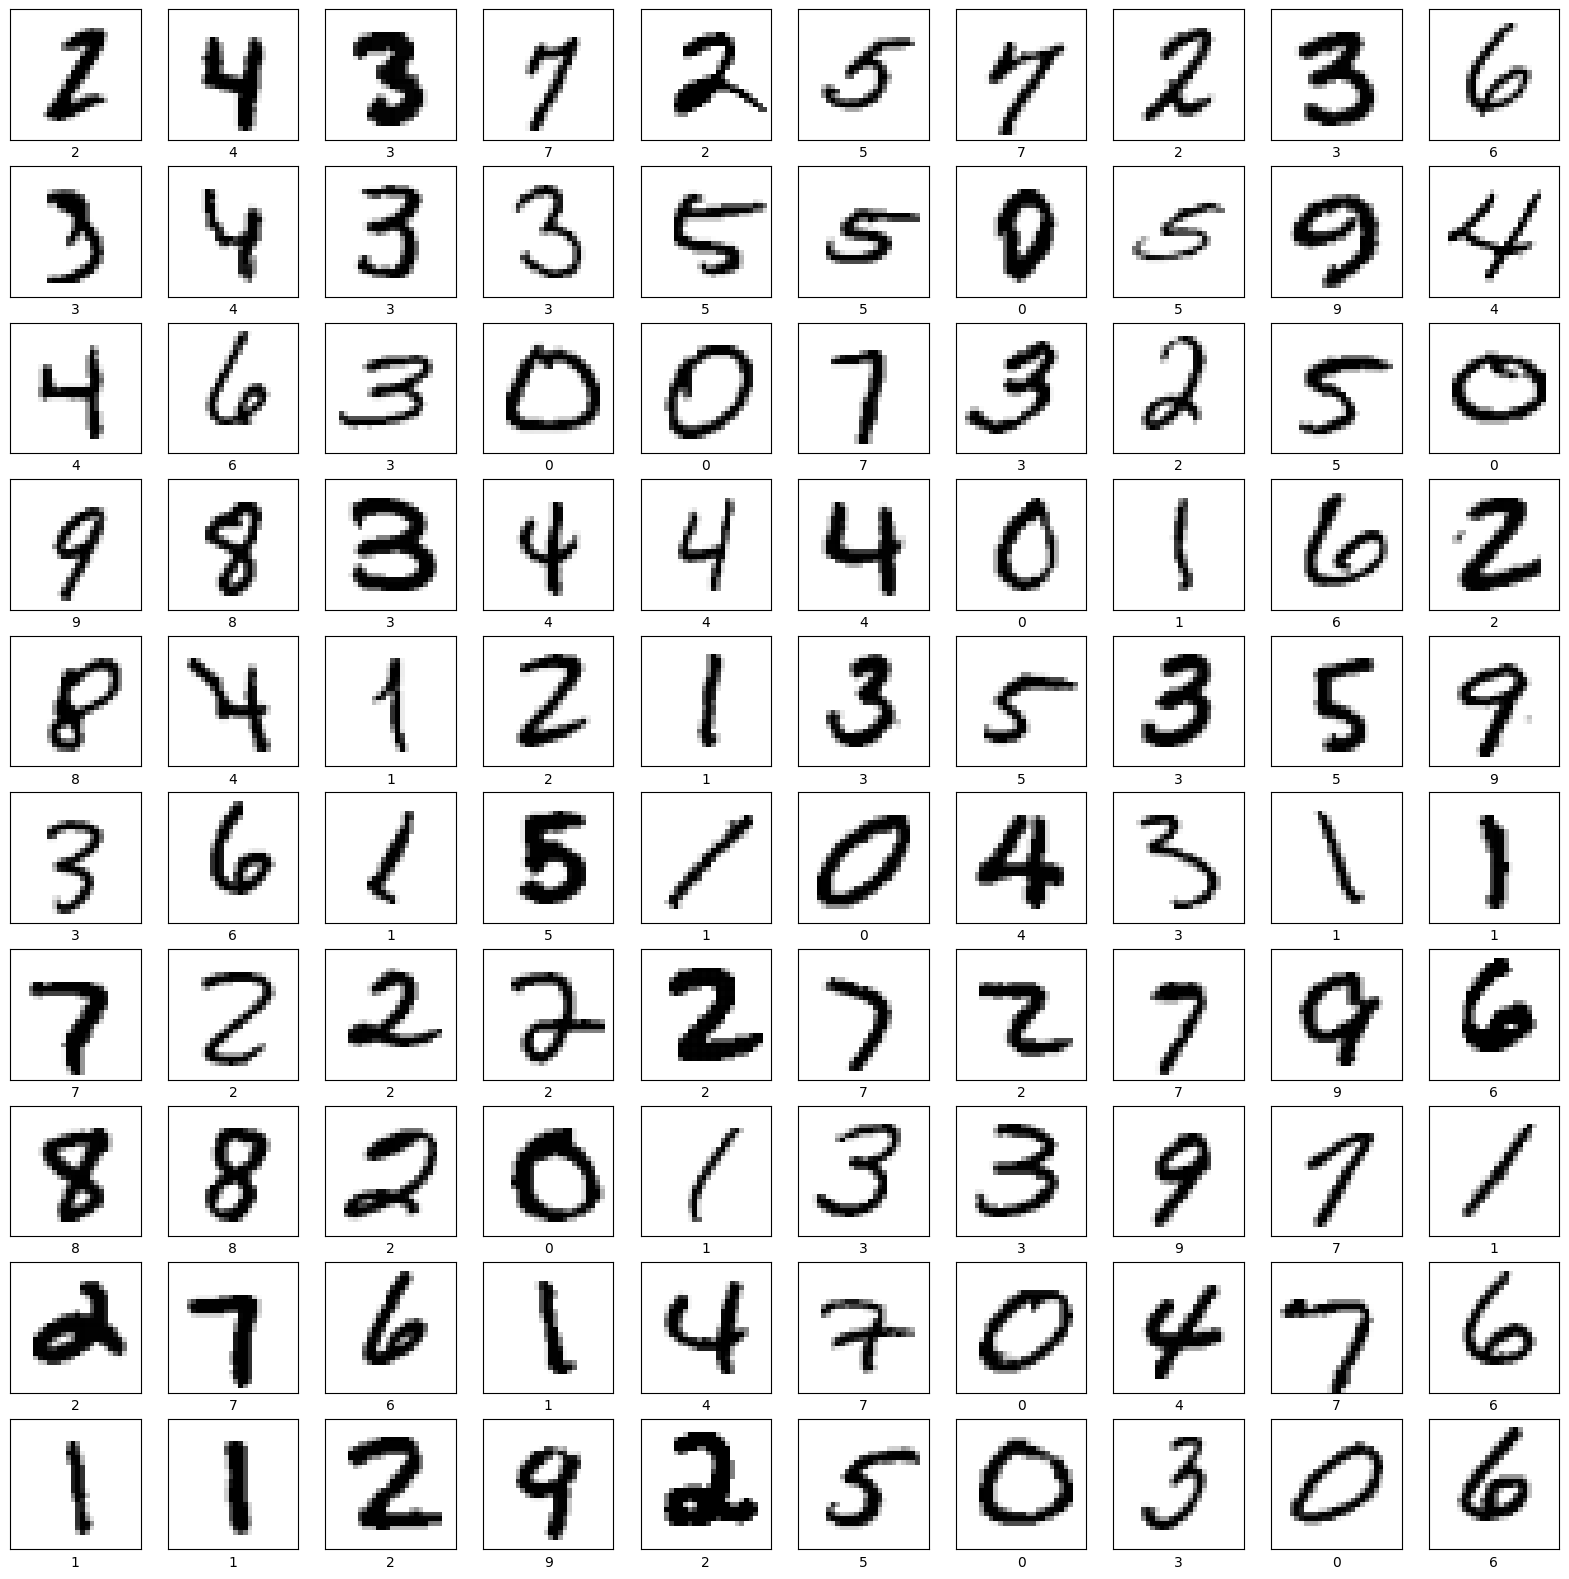

In [24]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_trainF[i], cmap=plt.cm.binary)
    plt.xlabel(y_trainF[i])
plt.show()

#**Reshaping train, test, and validation data**

In [27]:
x_train_chanels = x_trainF.reshape(
    x_trainF.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_chanels = x_validationF.reshape(
    x_validationF.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_chanels = x_testF.reshape(
    x_testF.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

**Check the updated shape**

In [28]:
print(x_train_chanels.shape)
print(x_validation_chanels.shape)
print(x_test_chanels.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(28000, 28, 28, 1)


**Normalize train, test, and validation data**

In [29]:
x_train_normalized = x_train_chanels / 255
x_validation_normalized = x_validation_chanels / 255
x_test_normalized = x_test_chanels / 255

#**Building the Model**

In [30]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

**model summary and visualization**

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

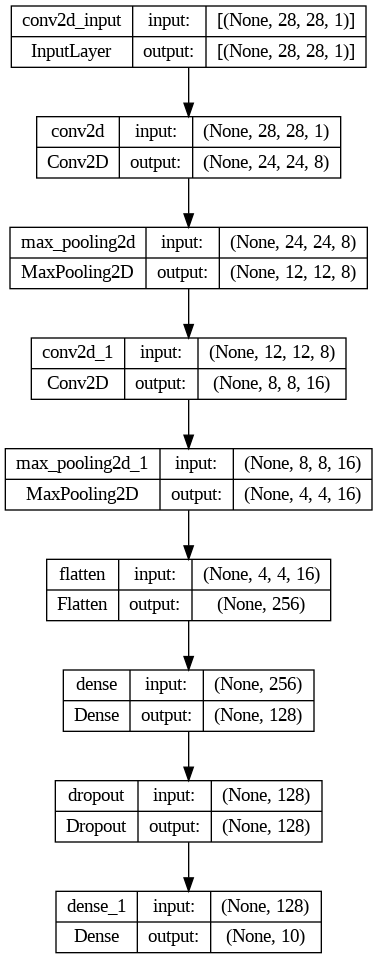

In [32]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

**compile model**

In [33]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

**Train the model**

In [35]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_trainF,
    epochs=10,
    validation_data=(x_validation_normalized, y_validationF),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 12s 10ms/step - loss: 0.2796 - accuracy: 0.9155 - val_loss: 0.0883 - val_accuracy: 0.9742
Epoch 2/10
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0893 - accuracy: 0.9718 - val_loss: 0.0612 - val_accuracy: 0.9819
Epoch 3/10
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0610 - accuracy: 0.9805 - val_loss: 0.0566 - val_accuracy: 0.9829
Epoch 4/10
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0498 - accuracy: 0.9838 - val_loss: 0.0497 - val_accuracy: 0.9858
Epoch 5/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0396 - accuracy: 0.9871 - val_loss: 0.0445 - val_accuracy: 0.9883
Epoch 6/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0482 - val_accuracy: 0.9858
Epoch 7/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0345 - accuracy: 0.9897 - val_loss: 0.0465 -

#**Evalutate the model**

**Loss**

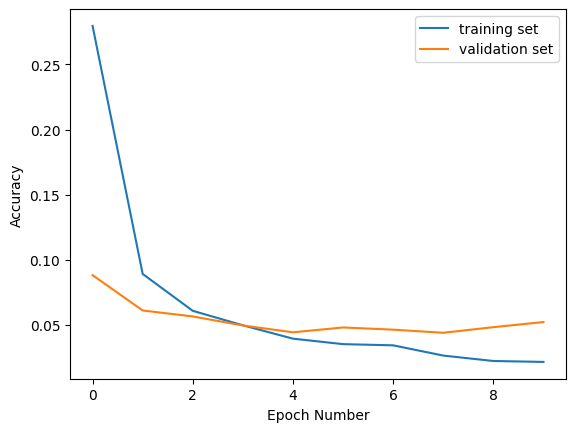

In [36]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

**Accuracy**

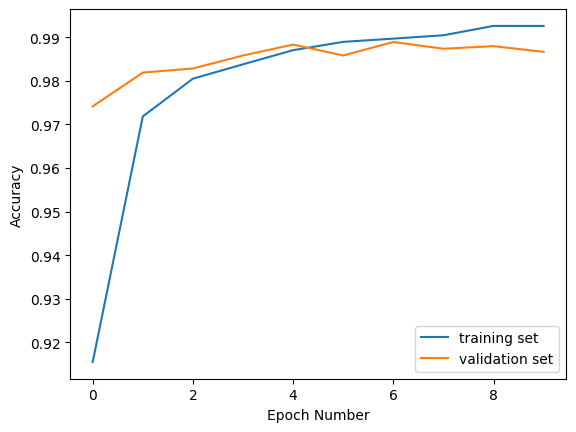

In [37]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [38]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_trainF)

1050/1050 [==============================] - 4s 3ms/step - loss: 0.0131 - accuracy: 0.9958


In [40]:
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validationF)

263/263 [==============================] - 1s 3ms/step - loss: 0.0523 - accuracy: 0.9867


#**Saving the model**

In [41]:
model_name = 'HandWrittenDigit_Classification_cnn.h5'
model.save(model_name, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
loaded_model = tf.keras.models.load_model(model_name)

#**prediction**

In [43]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 1s 3ms/step


**lets see if our modle predict correct right or not**

In [ ]:
#print the predictions

In [45]:
prediction = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(prediction)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


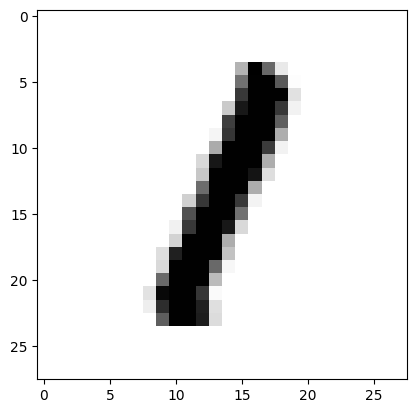

In [46]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

**So the model predict correctly**

**Test data**

In [47]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

875/875 [==============================] - 4s 4ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


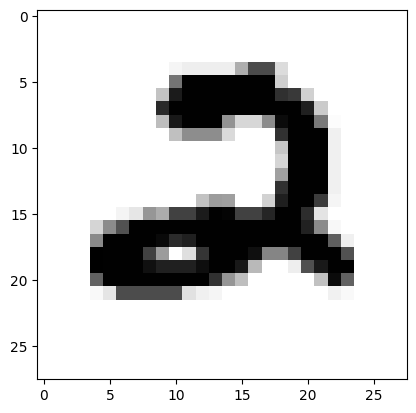

In [48]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()